**Importing** **libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
cm = sb.light_palette("blue", as_cmap=True)
import matplotlib.pyplot as plt
import altair as alt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
from plotly.offline import iplot
import plotly.graph_objs as go


**Reading the data**

In [2]:
df=pd.read_csv('matches.csv')

In [3]:
de=pd.read_csv('deliveries.csv')

**Viewing 5 rows of df**

In [4]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [5]:
de.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


**Basic statistics of df**

In [6]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,0.025997,13.715771,3.363951,NaN
std,166.709828,2.486247,0.159263,23.619282,3.416049,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,0.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,0.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,1.000000,144.000000,10.000000,NaN


In [7]:
de.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,30706.000000,30706.000000,30705.000000,30705.000000,30705.000000,30705.000000,30705.000000,30705.000000,30705.000000,30705.000000,30705.000000,30705.000000,30705.000000
mean,65.934378,1.475249,10.020322,3.623937,0.000782,0.039798,0.004592,0.024231,0.004494,0.000163,1.259827,0.073278,1.333105
std,38.144590,0.502516,5.660300,1.813876,0.027947,0.262231,0.106515,0.208281,0.072946,0.028534,1.639400,0.355626,1.625433
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,98.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,132.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,7.000000


**Basic info of df**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [9]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30706 entries, 0 to 30705
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          30706 non-null  int64  
 1   inning            30706 non-null  int64  
 2   batting_team      30706 non-null  object 
 3   bowling_team      30706 non-null  object 
 4   over              30705 non-null  float64
 5   ball              30705 non-null  float64
 6   batsman           30705 non-null  object 
 7   non_striker       30705 non-null  object 
 8   bowler            30705 non-null  object 
 9   is_super_over     30705 non-null  float64
 10  wide_runs         30705 non-null  float64
 11  bye_runs          30705 non-null  float64
 12  legbye_runs       30705 non-null  float64
 13  noball_runs       30705 non-null  float64
 14  penalty_runs      30705 non-null  float64
 15  batsman_runs      30705 non-null  float64
 16  extra_runs        30705 non-null  float6

**Number of null values in each row**



In [10]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

In [11]:
de.isnull().sum()

match_id                0
inning                  0
batting_team            0
bowling_team            0
over                    1
ball                    1
batsman                 1
non_striker             1
bowler                  1
is_super_over           1
wide_runs               1
bye_runs                1
legbye_runs             1
noball_runs             1
penalty_runs            1
batsman_runs            1
extra_runs              1
total_runs              1
player_dismissed    29119
dismissal_kind      29119
fielder             29564
dtype: int64

In [12]:
col_with_missing=np.where(df['city'].isnull()==True)
col_with_missing


(array([402, 403, 407, 409, 410, 415, 417]),)

**Fill Null values in ‘city’ column based on ‘venues’ values**

In [13]:
df['city'].fillna(df['venue'],inplace=True)
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,573,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
573,574,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
574,575,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


**Unique value in team1 column**

In [14]:
df.team1.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [15]:
df.team2.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [16]:
df.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)

**Replace string columns to numeric values**

In [17]:
label_result=LabelEncoder()

In [18]:
df['result']=label_result.fit_transform(df['result'])

In [19]:
label_toss_decision=LabelEncoder()

In [20]:
df['toss_decision']=label_toss_decision.fit_transform(df['toss_decision'])
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,1,1,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,0,1,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,0,1,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,0,1,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,0,1,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,573,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,1,1,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
573,574,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,1,1,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
574,575,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,1,1,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,1,1,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


**Drop insignificant columns having very large missing values**

In [21]:
df.drop(['umpire3'],axis='columns',inplace=True)

In [22]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,1,1,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,0,1,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,0,1,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,0,1,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,0,1,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,573,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,1,1,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
573,574,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,1,1,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
574,575,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,1,1,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,1,1,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


**Drop all rows where winner values are missing**

In [23]:
np.where(df['winner'].notna()==False)

(array([241, 486, 511]),)

In [26]:
df.drop([df.index[241],df.index[486],df.index[511]],inplace=True)

**What is the maximum number of wins by any team in particular seasons?**

In [27]:
team = df.groupby('season')['winner'].value_counts()
team

season  winner                
2008    Rajasthan Royals          13
        Kings XI Punjab           10
        Chennai Super Kings        9
        Delhi Daredevils           7
        Mumbai Indians             7
                                  ..
2016    Kolkata Knight Riders      8
        Delhi Daredevils           7
        Mumbai Indians             7
        Rising Pune Supergiant     5
        Kings XI Punjab            4
Name: winner, Length: 76, dtype: int64

In [28]:
year = 2008
win_per_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in team.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season = win_per_season.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)


In [29]:
win_per_season

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



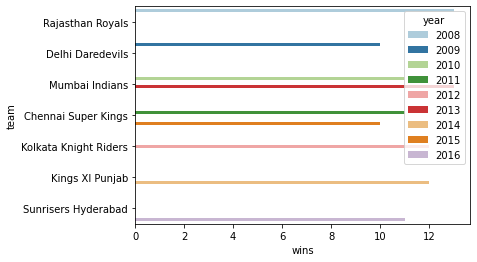

In [30]:
sb.barplot('wins', 'team', hue='year', data=win_per_season, palette='Paired')

**Which stadium hosted the most number of IPL matches?**

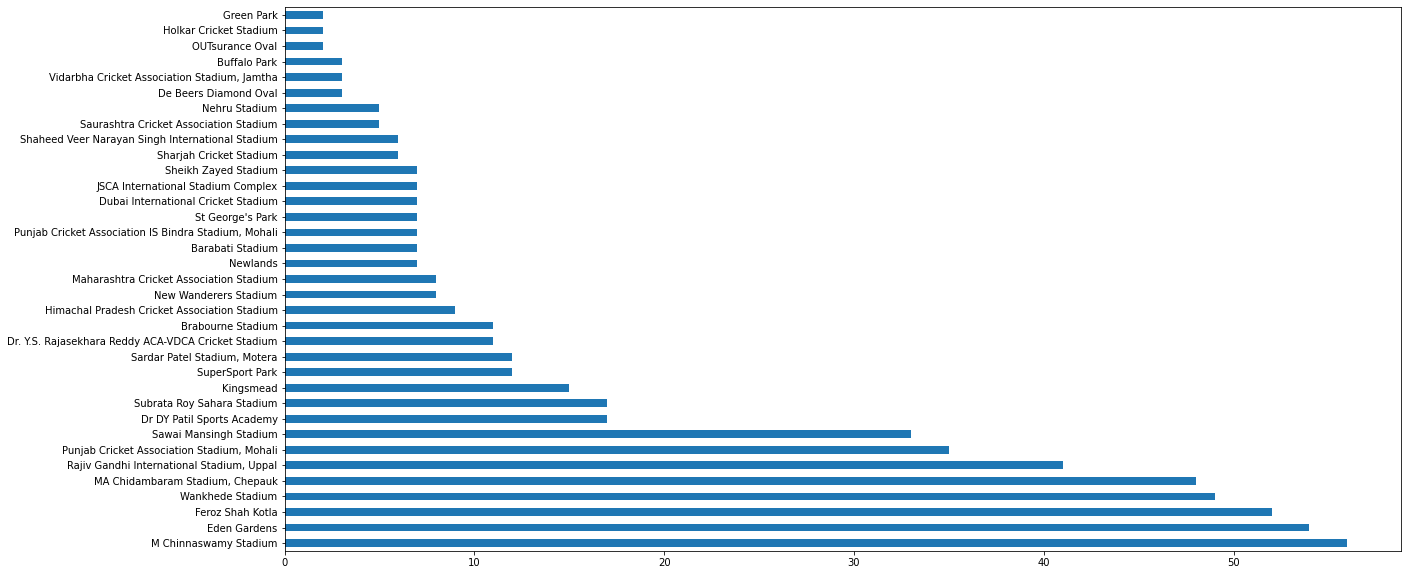

In [31]:
df['venue'].value_counts().plot(kind='barh',figsize=(20,10))

In [32]:
import random
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [33]:
most_venue_plot = [go.Bar(
    x = df['venue'].value_counts().index,
    y = df['venue'].value_counts().values,
    marker = dict(color = random_colors(len(df['venue'].value_counts().index)),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
    autosize=False,
                      width=1000,
                      height=600,
                      title='Most IPL Matches hosted by stadium',
                      xaxis = dict(title='venue'),
                      yaxis = dict(title='matches'),template = 'presentation',
                                         margin=go.layout.Margin(
                                                    l=100,
                                                    r=50,
                                                    b=200,
                                                    t=100,
                                                    pad = 4
                                                )
)

fig = go.Figure(data=most_venue_plot,layout = layout)
iplot(fig)

**Which team has won the most number of matches?**

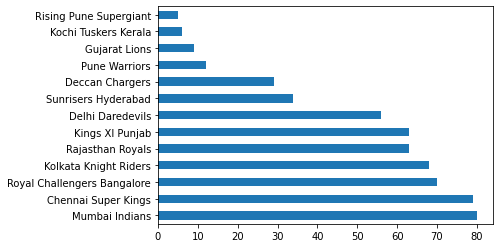

In [34]:
df['winner'].value_counts().plot(kind='barh')

In [35]:
most_win_plot = [go.Bar(
    x = df['winner'].value_counts().index,
    y = df['winner'].value_counts().values,
    marker = dict(color = random_colors(len(df['winner'].value_counts().index)),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
    autosize=False,
                      width=1000,
                      height=600,
                      title='Most wins by team',
                      xaxis = dict(title='Team'),
                      yaxis = dict(title='matches'),template = 'presentation',
                                         margin=go.layout.Margin(
                                                    l=100,
                                                    r=50,
                                                    b=200,
                                                    t=100,
                                                    pad = 4
                                                )
)

fig = go.Figure(data=most_win_plot,layout = layout)
iplot(fig)

**Which team has won the most percentage of matches?**

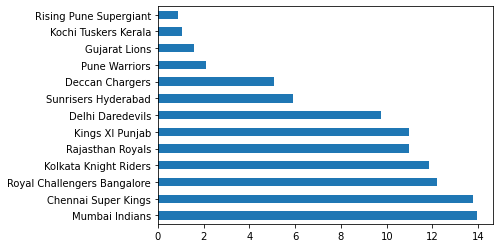

In [36]:
((df['winner'].value_counts()/df['winner'].value_counts().sum())*100).plot(kind='barh')

**Which player has won the most number of Man of the Match (MoM) awards?**

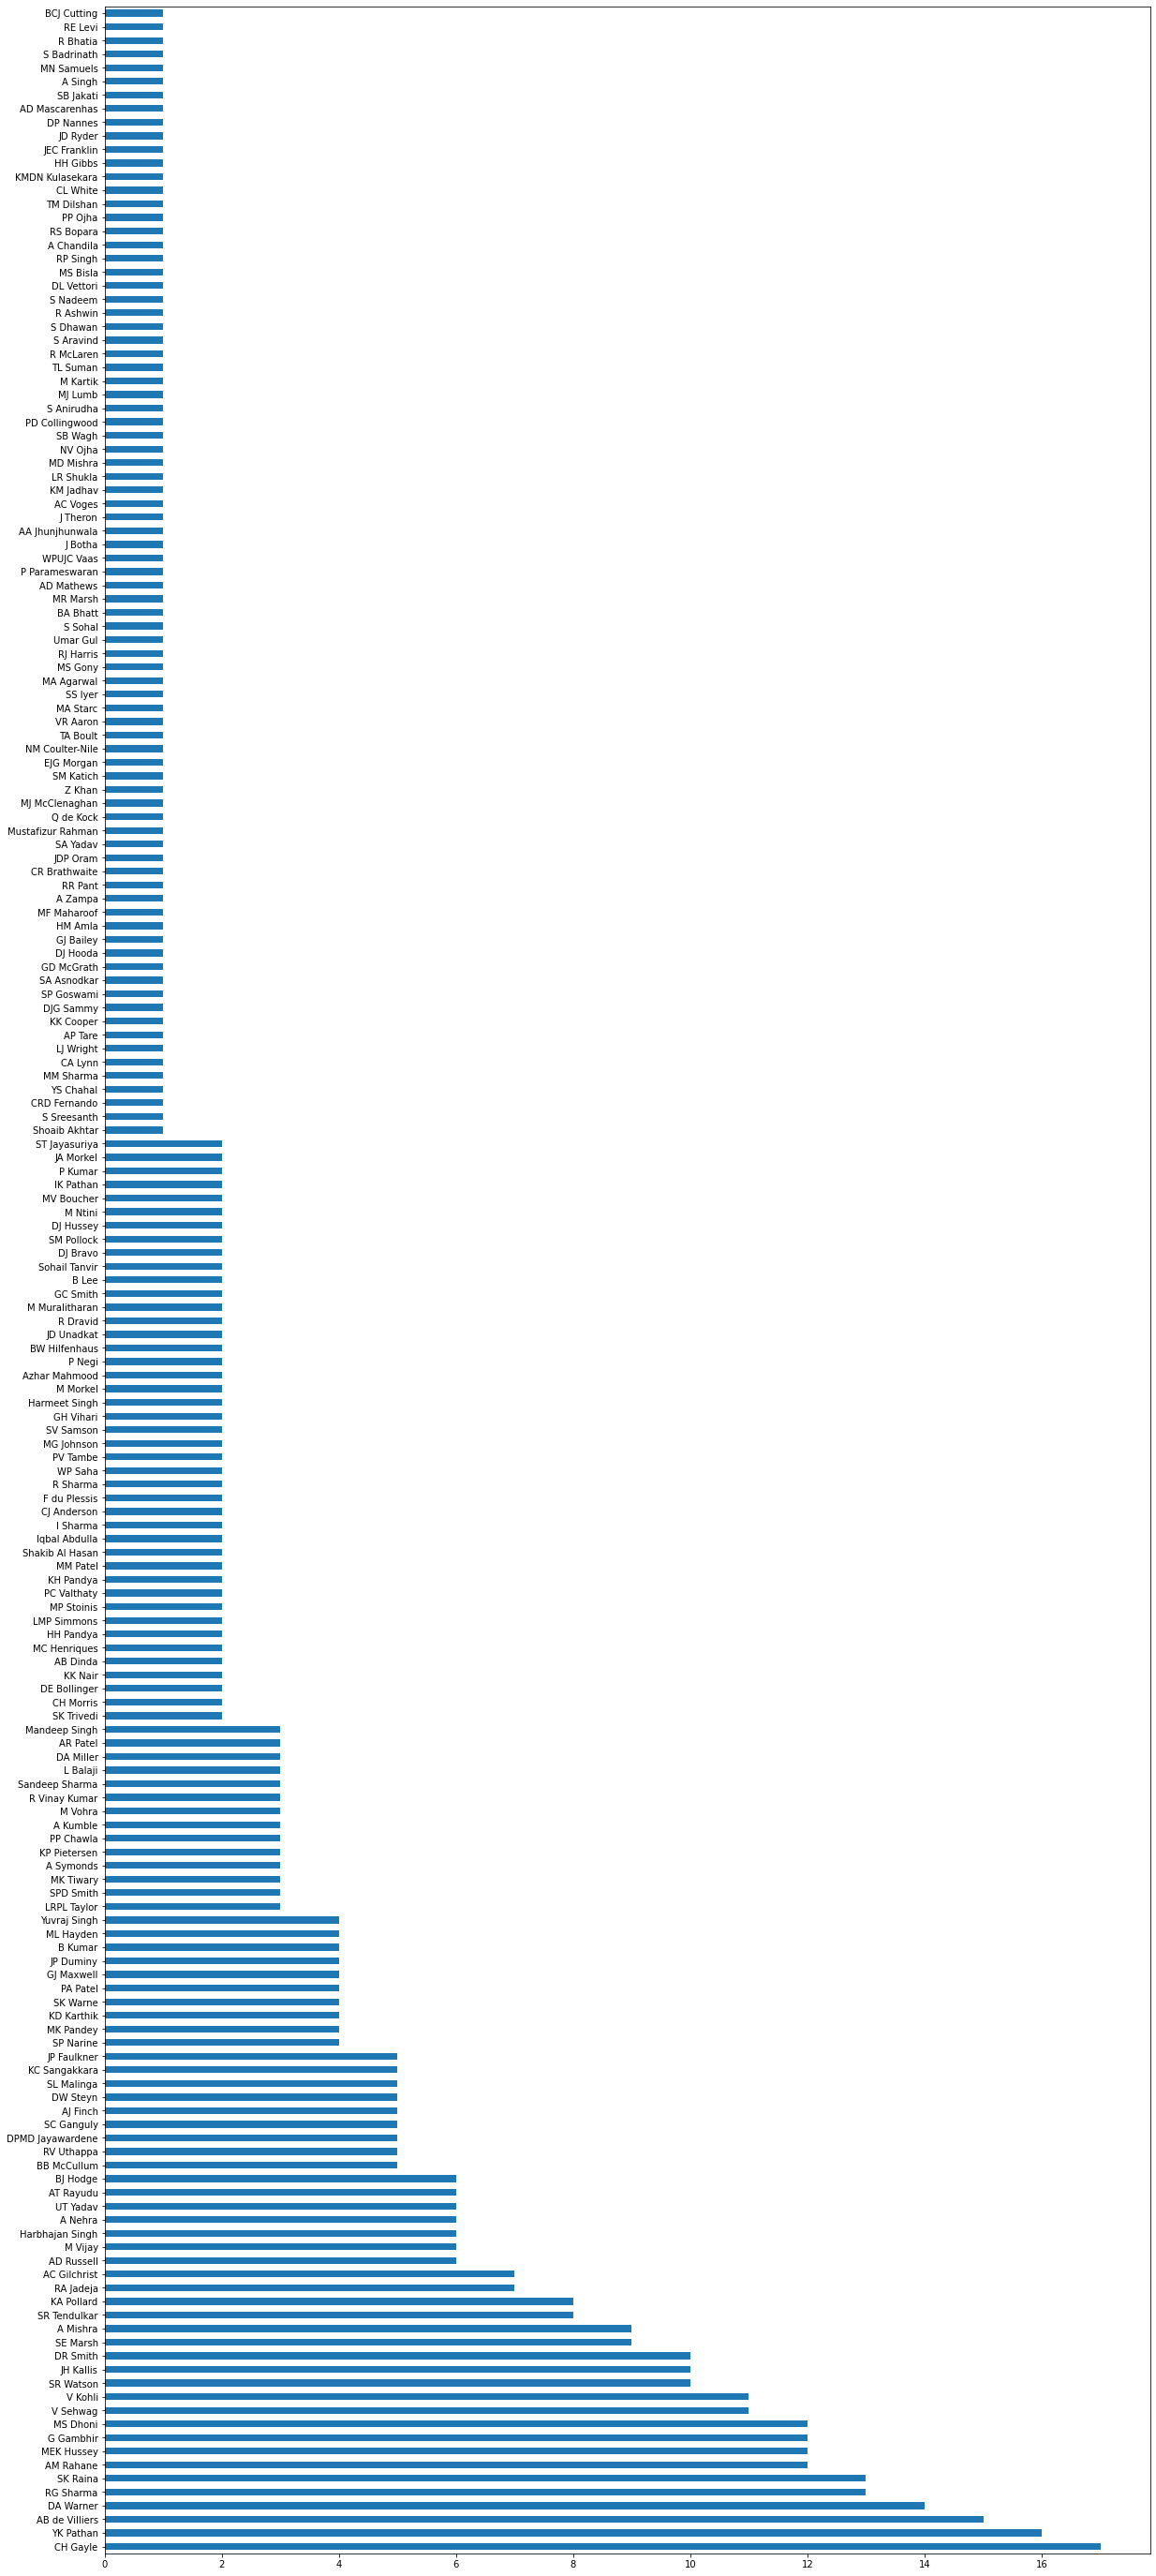

In [37]:
df['player_of_match'].value_counts().plot(kind='barh',figsize=(20,50))

In [38]:
df.player_of_match.unique()

array(['BB McCullum', 'MEK Hussey', 'MF Maharoof', 'MV Boucher',
       'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden', 'YK Pathan',
       'KC Sangakkara', 'JDP Oram', 'AC Gilchrist', 'SM Katich',
       'MS Dhoni', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 'IK Pathan', 'SM Pollock',
       'Sohail Tanvir', 'S Sreesanth', 'A Nehra', 'SC Ganguly',
       'CRD Fernando', 'L Balaji', 'Shoaib Akhtar', 'A Mishra',
       'DPMD Jayawardene', 'GC Smith', 'DJ Bravo', 'M Ntini',
       'SP Goswami', 'A Kumble', 'KD Karthik', 'JA Morkel', 'P Kumar',
       'Umar Gul', 'SK Raina', 'SR Tendulkar', 'R Dravid', 'DL Vettori',
       'RP Singh', 'M Muralitharan', 'CH Gayle', 'AB de Villiers',
       'RS Bopara', 'PP Ojha', 'TM Dilshan', 'HH Gibbs', 'DP Nannes',
       'JP Duminy', 'Yuvraj Singh', 'SB Jakati', 'JH Kallis', 'G Gambhir',
       'RG Sharma', 'A Singh', 'S Badrinath', 'DR Smith', 'LRPL Taylor',
       'Harbhajan Singh', 'R Bhatia', 'SK Warne', 'B

**Which team has won the most number of tosses?**

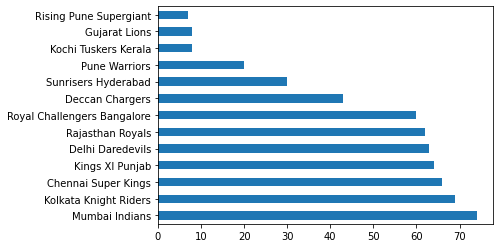

In [39]:
df['toss_winner'].value_counts().plot(kind='barh')

**Which team has won the most percentage of tosses?**

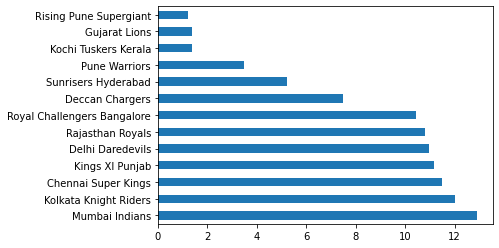

In [40]:
((df['toss_winner'].value_counts()/df['toss_winner'].value_counts().sum())*100).plot(kind='barh')

**Most 50s and 100s scored**

In [41]:
cen = de.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
cen = cen[cen['batsman_runs']>=100]
cen = cen.groupby(['batsman']).agg({'count'})
cen.columns = cen.columns.droplevel()
cen = cen.sort_values(by='count',ascending=False).reset_index()
half_cen = de.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_cen = half_cen[half_cen['batsman_runs']>=50]
half_cen = half_cen[half_cen['batsman_runs']<100]
half_cen = half_cen.groupby(['batsman']).agg({'count'})
half_cen.columns = half_cen.columns.droplevel()
half_cen = half_cen.sort_values(by='count',ascending=False).reset_index()

In [42]:
df_big = pd.merge(cen,half_cen, on='batsman',how='right')
df_big = df_big.fillna(0)
df_big

,batsman,count_x,count_y
0,G Gambhir,0.0,9
1,RG Sharma,0.0,8
2,S Dhawan,0.0,7
3,SE Marsh,1.0,7
4,SK Raina,0.0,6
...,...,...,...
76,Mandeep Singh,0.0,1
77,Niraj Patel,0.0,1
78,RS Bopara,0.0,1
79,S Vidyut,0.0,1


In [43]:
df_big.rename(columns = {'count_x' : '100s', 'count_y' : '50s'},inplace=True)

In [44]:
centuries = df_big.sort_values(by='100s',ascending=False).head(30)
half_centuries = df_big.sort_values(by='50s',ascending=False).head(30)

In [45]:
fig = {"data" : [{"x" : centuries["batsman"],"y" : centuries["100s"],
                  "name" : "100s","marker" : {"color" : "lightblue","size": 12},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" ,
                  "xaxis" : "x1","yaxis" : "y1"},
        
                 {"x" : half_centuries["batsman"],"y" : half_centuries["50s"],
                  "name" : "50s","marker" : {"color" : "brown","size": 12},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2"}],
       
        "layout" : {"title": "Total centuries and half-centuries by top batsman",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : True},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "50s"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Batsman"},
                    "yaxis" : {"domain" :[0, .45], "anchor" : "x2","title": "100s"}}}

iplot(fig)

**Bi-histogram plot for some Team1 vs Team2 with x axis as different years**

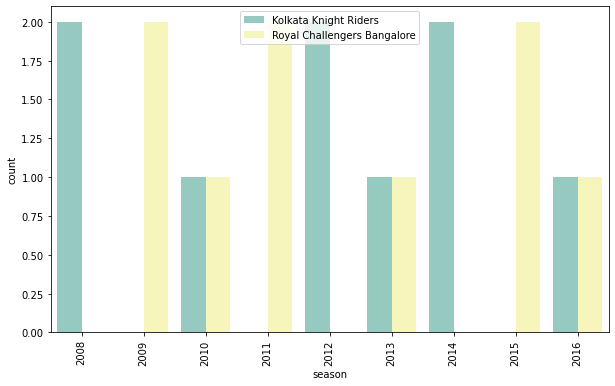

In [46]:
def team1_vs_team2(team1,team2):
    mt1=df[((df['team1']==team1)|(df['team2']==team1))&((df['team1']==team2)|(df['team2']==team2))]
    sb.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()
team1_vs_team2('Kolkata Knight Riders','Royal Challengers Bangalore')

**Scatter plot with y-axis as mean strike rate per over, x-axis as number of over**

In [47]:
key='batsman'
topbatsmen=de[key].value_counts()[:50].index

In [48]:
df_=de.pivot_table(index=['batsman','over'],aggfunc=['count','sum'],values='batsman_runs'
                  )

df_=df_.fillna(0).reset_index()
df_.columns=['batsman','over','balls','runs']
df_['strike_rate']=round(df_.runs/df_.balls*100,1)


In [49]:
alt.data_transformers.disable_max_rows()

df_.columns
alt.Chart(df_[df_.batsman.isin(topbatsmen)]).mark_point(shape="circle").encode(
alt.X('over'),
alt.Y('mean(strike_rate)'),
color='batsman',
text="batsman",
size='balls',
opacity='runs',
tooltip=list(df_.columns)
).properties(width=600,height=500)

alt.Chart(...)